In [2]:
import numpy as np
import pandas as pd
from math import ceil
import transformers as ppb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,title,tag,subtag,url,starter_content,starter_stem,reply_content,reply_stem
0,0,Public calendar for SmartThings developer events,Groups & Events,NaN,https://community.smartthings.com/t/public-cal...,dear community in 2015 we are going to do a be...,"['dear', 'commun', '2015', 'go', 'better', 'jo...",can anyone join this thursday call or on locat...,"['anyon', 'join', 'thursday', 'call', 'locat',..."
1,1,SmartThings use in a restaurant / business - R...,Projects & Stories,NaN,https://community.smartthings.com/t/smartthing...,this post is partially out of boredom looking ...,"['post', 'partial', 'boredom', 'look', 'someth...",there are lots of automation systems available...,"['lot', 'autom', 'system', 'avail', 'small', '..."
2,2,Shutting something off after power usage excee...,SmartApps & Automations,NaN,https://community.smartthings.com/t/shutting-s...,hi i have a coffee grinder that my employees a...,"['hi', 'coffe', 'grinder', 'employe', 'sometim...",look up webcore it’s the rule engine to cook u...,"['look', 'webcor', 'it’', 'rule', 'engin', 'co..."
3,3,[BETA] Community SmartApp Installer,Community Created SmartApps,smartapp_misc,https://community.smartthings.com/t/beta-commu...,ok i’m ready to finally share this with the co...,"['ok', 'i’m', 'readi', 'final', 'share', 'comm...",wow very cool can you tell us more about which...,"['wow', 'cool', 'tell', 'us', 'smartapp', 'sup..."
4,4,'Fibaro Z-Wave FGK-101 Temperature & Door/Wind...,Community Created Device Types,fibaro,https://community.smartthings.com/t/fibaro-z-w...,the fibaro fgk101 temperature doorwindow senso...,"['fibaro', 'fgk101', 'temperatur', 'doorwindow...",geeji thanks for creating this i’m just starti...,"['geeji', 'thank', 'creat', 'i’m', 'start', 'p..."


In [3]:
import torch

In [4]:
df['total_content'] = df['starter_content'].astype(str) + " " + df['reply_content'].astype(str)
df.head()

,Unnamed: 0,title,tag,subtag,url,starter_content,starter_stem,reply_content,reply_stem,total_content
0,0,Public calendar for SmartThings developer events,Groups & Events,NaN,https://community.smartthings.com/t/public-cal...,dear community in 2015 we are going to do a be...,"['dear', 'commun', '2015', 'go', 'better', 'jo...",can anyone join this thursday call or on locat...,"['anyon', 'join', 'thursday', 'call', 'locat',...",dear community in 2015 we are going to do a be...
1,1,SmartThings use in a restaurant / business - R...,Projects & Stories,NaN,https://community.smartthings.com/t/smartthing...,this post is partially out of boredom looking ...,"['post', 'partial', 'boredom', 'look', 'someth...",there are lots of automation systems available...,"['lot', 'autom', 'system', 'avail', 'small', '...",this post is partially out of boredom looking ...
2,2,Shutting something off after power usage excee...,SmartApps & Automations,NaN,https://community.smartthings.com/t/shutting-s...,hi i have a coffee grinder that my employees a...,"['hi', 'coffe', 'grinder', 'employe', 'sometim...",look up webcore it’s the rule engine to cook u...,"['look', 'webcor', 'it’', 'rule', 'engin', 'co...",hi i have a coffee grinder that my employees a...
3,3,[BETA] Community SmartApp Installer,Community Created SmartApps,smartapp_misc,https://community.smartthings.com/t/beta-commu...,ok i’m ready to finally share this with the co...,"['ok', 'i’m', 'readi', 'final', 'share', 'comm...",wow very cool can you tell us more about which...,"['wow', 'cool', 'tell', 'us', 'smartapp', 'sup...",ok i’m ready to finally share this with the co...
4,4,'Fibaro Z-Wave FGK-101 Temperature & Door/Wind...,Community Created Device Types,fibaro,https://community.smartthings.com/t/fibaro-z-w...,the fibaro fgk101 temperature doorwindow senso...,"['fibaro', 'fgk101', 'temperatur', 'doorwindow...",geeji thanks for creating this i’m just starti...,"['geeji', 'thank', 'creat', 'i’m', 'start', 'p...",the fibaro fgk101 temperature doorwindow senso...


In [5]:
sub_df = df[["tag","total_content"]]
sub_df.head()

,tag,total_content
0,Groups & Events,dear community in 2015 we are going to do a be...
1,Projects & Stories,this post is partially out of boredom looking ...
2,SmartApps & Automations,hi i have a coffee grinder that my employees a...
3,Community Created SmartApps,ok i’m ready to finally share this with the co...
4,Community Created Device Types,the fibaro fgk101 temperature doorwindow senso...


In [6]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

In [7]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [8]:
tokenized = sub_df['total_content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (607 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1419 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1292 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11642 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2893 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1326 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4679 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1817 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1327 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (817 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1878 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (586 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1334 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (5002 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2714 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1156 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1319 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (898 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1526 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2595 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4322 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (946 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1067 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1312 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5236 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1312 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1065 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3493 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1282 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (896 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (851 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1175 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2652 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (6004 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1333 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2092 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (959 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3489 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1004 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4326 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1488 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1475 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1014 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1061 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1632 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3110 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1981 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (594 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (603 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1985 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1390 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1704 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1733 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1090 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1638 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5848 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (887 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (692 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1684 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1191 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1576 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2984 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (726 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1503 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (901 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (3179 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3590 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2643 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1148 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1789 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1255 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1883 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1582 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (826 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1075 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1326 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (755 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (742 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (2206 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1927 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2064 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1205 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (818 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (840 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1716 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1198 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2113 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1658 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (688 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2464 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1546 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1848 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1321 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1798 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1839 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1082 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1631 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1797 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (765 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1746 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1120 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (729 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (832 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1859 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2142 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2374 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (819 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (905 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4030 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (512 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (3429 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1515 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3246 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1034 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (741 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (944 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2938 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (852 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (5683 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (865 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (719 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2619 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (3348 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1712 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2729 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1879 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2728 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1029 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2594 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1328 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2322 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3212 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1693 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1644 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2426 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (2377 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1378 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (676 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (566 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1755 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (4559 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1761 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1213 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1253 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7231 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1781 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (580 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (902 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (929 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2961 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (864 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (819 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1236 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2733 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1938 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (4752 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3729 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1194 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (862 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1161 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (1010 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (882 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1332 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1280 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1581 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (2314 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (910 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1952 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (656 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1597 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

In [47]:
split_list = []
tag = sub_df['tag']
split_list_tag = []
new_post = []
count = 0
for k in range(len(tokenized)):
    new_post.append(1)
    if(len(tokenized[k])>512):
        for j in range(ceil(len(tokenized[k])/512)):
            if((j+1)*512 < len(tokenized[k])):
                split_list.append(tokenized[k][j*512:(j+1)*512])
                split_list_tag.append(tag[count])
                new_post.append(0)
            else:
                split_list.append(tokenized[k][j*512:])
                split_list_tag.append(tag[count])
    else:
        split_list.append(tokenized[k])
        split_list_tag.append(tag[count])
    count += 1
    

In [10]:
len(split_list)

7977

In [11]:
len(split_list_tag)

7977

In [48]:
len(new_post)

7977

In [12]:
maxlength = 512
padded= split_list.copy()
for i in range(len(padded)):
    padded[i] +=[0] * (maxlength - len(padded[i]))
    padded[i] =  padded[i][:maxlength] #cut
    padded[i] = np.array(padded[i],dtype = int).astype(int)
padded = np.array(padded)

In [13]:
padded_array = []
for i in range(len(padded)):
    padded_array+=[padded[i]]

In [16]:
input_ids = torch.tensor(padded_array[:100])
b_input_ids = torch.tensor(input_ids).to(torch.int64)

C:\Users\Brandon C\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [32]:
len(b_input_ids)

100

In [33]:
len(padded_array)

7977

In [18]:
with torch.no_grad():
    last_hidden_states = model(b_input_ids)

In [19]:
last_hidden_states

(tensor([[[-0.5789,  0.1538, -0.1094,  ..., -0.3910,  0.5570, -0.1659],
          [ 0.2895,  0.4292,  1.7282,  ..., -0.4638,  0.1823, -0.6260],
          [ 0.5283,  0.0381,  0.3570,  ..., -0.6254,  0.7028, -0.5281],
          ...,
          [ 0.0537,  0.2046,  0.1961,  ..., -0.4768, -0.1207, -1.5024],
          [ 0.2483,  0.0528,  0.2800,  ..., -0.6188,  0.0090, -1.4465],
          [ 0.0750,  0.2197,  0.2486,  ..., -0.7811,  0.0559, -1.5844]],
 
         [[ 0.5279,  0.2129,  0.3830,  ..., -0.5624,  0.0171,  0.2886],
          [-0.4404,  0.4081, -0.2053,  ...,  0.1330,  0.1353, -0.0987],
          [ 0.4522,  0.3718, -0.0727,  ...,  0.4861, -0.2532,  0.2402],
          ...,
          [ 0.3163,  1.1277,  0.0182,  ..., -0.2158, -0.4562,  0.0575],
          [ 0.1873,  0.7812,  0.0422,  ..., -0.3470, -0.5410, -0.2821],
          [ 0.2160,  1.2941, -0.2431,  ..., -0.2983, -0.5301, -0.1249]],
 
         [[-0.2800,  0.5512,  0.2378,  ..., -0.6640,  0.5659, -0.8188],
          [-0.0432,  1.1355,

In [20]:
features = last_hidden_states[0][:,0,:].numpy()

In [21]:
features

array([[-0.5788809 ,  0.15375432, -0.10938442, ..., -0.3910003 ,
         0.55704546, -0.16588716],
       [ 0.5278708 ,  0.21288744,  0.3830432 , ..., -0.56241333,
         0.01706377,  0.2886103 ],
       [-0.27999967,  0.5511888 ,  0.237753  , ..., -0.66395926,
         0.5659187 , -0.81882566],
       ...,
       [ 0.35174534,  0.18063879,  0.07448415, ..., -0.08930188,
        -0.04051226,  0.0439415 ],
       [ 0.25417393, -0.06179305,  0.15571594, ..., -0.17401019,
        -0.09118912,  0.45580006],
       [-0.47667408,  0.63492167, -0.17191935, ..., -0.4676221 ,
         0.798301  , -0.52281445]], dtype=float32)

In [22]:
len(features[0])

768

In [53]:
features.shape

(100, 768)

In [55]:
total_features = np.empty((len(padded_array),768))
for index in range(ceil(len(padded_array)/100)):
    if((index+1)*100 < len(padded_array)):
        input_ids = torch.tensor(padded_array[index*100:((index+1)*100)])
        b_input_ids = torch.tensor(input_ids).to(torch.int64)
        with torch.no_grad():
            last_hidden_states = model(b_input_ids)
        features = last_hidden_states[0][:,0,:].numpy()
        total_features[index*100:((index+1)*100)] = features
    else:
        input_ids = torch.tensor(padded_array[index*100:])
        b_input_ids = torch.tensor(input_ids).to(torch.int64)
        with torch.no_grad():
            last_hidden_states = model(b_input_ids)
        features = last_hidden_states[0][:,0,:].numpy()
        total_features[index*100:] = features

C:\Users\Brandon C\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
C:\Users\Brandon C\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


In [128]:
X = total_features
Y = split_list_tag
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=66)

In [129]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [130]:
len(rfc_predict)

2633

In [137]:
from collections import Counter
index = 0
match = 0
num_posts = 0
temp_list = []
while(index < len(rfc_predict)):
    temp_list.append(rfc_predict[index])
    if(new_post[index+1] == 1):
        c = Counter(temp_list)
        mc_tuple = c.most_common(1)
        #print(mc_tuple)
        mc_tag = mc_tuple[0][0]
        if(mc_tag == split_list_tag[index]):
            match += 1
        temp_list = []
        num_posts += 1

    index += 1

print(match)
print(num_posts)
print("Accuracy for posts: " + str(match/num_posts))


285
861
Accuracy for posts: 0.3310104529616725


In [141]:
#the first number in the list indicates number of correctly guessed 
#the second number in the list indicates total number of posts with that tag
index = 0
tag_dict = {}
bad_predict = {}
while(index < len(rfc_predict)):
    temp_list.append(rfc_predict[index])
    if(new_post[index+1] == 1):
        c = Counter(temp_list)
        mc_tuple = c.most_common(1)
        mc_tag = mc_tuple[0][0]
        
        if(split_list_tag[index] in tag_dict):
            tag_dict[split_list_tag[index]][1] += 1
        else:
            tag_dict[split_list_tag[index]] = [0, 1]
            
        if(mc_tag == split_list_tag[index]):
            tag_dict[split_list_tag[index]][0] += 1
        else:
            if(split_list_tag[index] in bad_predict):
                if(mc_tag in bad_predict[split_list_tag[index]]):
                    bad_predict[split_list_tag[index]][mc_tag] +=1
                else:
                    bad_predict[split_list_tag[index]][mc_tag] = 1
            else:
                bad_predict[split_list_tag[index]] = {mc_tag : 1}
        temp_list = []

    index += 1

tag_dict

{'Groups & Events': [0, 4],
 'Projects & Stories': [0, 47],
 'SmartApps & Automations': [0, 50],
 'Community Created SmartApps': [1, 59],
 'Community Created Device Types': [0, 85],
 'Devices & Integrations': [283, 307],
 'Connected Things': [1, 107],
 'Apps & Clients': [0, 19],
 'General Discussion': [0, 51],
 'Hub Firmware Beta': [0, 1],
 'Deals': [0, 16],
 'FAQ': [0, 10],
 'Device Ideas': [0, 4],
 'SmartThings (Samsung Connect)': [0, 15],
 'Announcements': [0, 6],
 'Writing Device Types': [0, 16],
 'Writing SmartApps': [0, 19],
 'Features & Feedback': [0, 6],
 'Automation Ideas': [0, 15],
 'Wiki': [0, 2],
 'webCoRE': [0, 8],
 'iOS': [0, 2],
 'Ideas and Suggestions': [0, 1],
 'How-To': [0, 5],
 'Meta': [0, 3],
 'Android': [0, 3]}

In [142]:
bad_predict

{'Groups & Events': {'Community Created Device Types': 1,
  'Devices & Integrations': 3},
 'Projects & Stories': {'Devices & Integrations': 42,
  'Community Created Device Types': 3,
  'Community Created SmartApps': 1,
  'Connected Things': 1},
 'SmartApps & Automations': {'Devices & Integrations': 47,
  'Community Created Device Types': 2,
  'Connected Things': 1},
 'Community Created SmartApps': {'Devices & Integrations': 55,
  'Community Created Device Types': 2,
  'Connected Things': 1},
 'Community Created Device Types': {'Devices & Integrations': 83,
  'Community Created SmartApps': 1,
  'Connected Things': 1},
 'Connected Things': {'Devices & Integrations': 99,
  'Community Created Device Types': 6,
  'Deals': 1},
 'Apps & Clients': {'Devices & Integrations': 17,
  'Community Created SmartApps': 1,
  'Community Created Device Types': 1},
 'General Discussion': {'Devices & Integrations': 47,
  'Community Created Device Types': 2,
  'Community Created SmartApps': 2},
 'Hub Firmwar

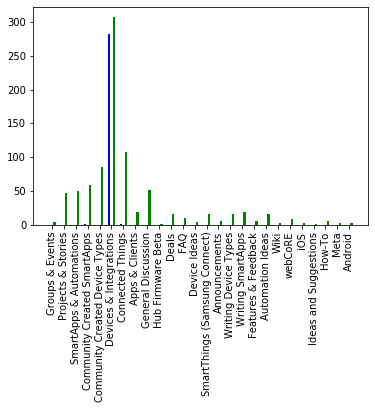

In [158]:
import matplotlib.pyplot as plt

keys = [key for key in tag_dict.keys()]
values = [value for value in tag_dict.values()]
fig, ax = plt.subplots()
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values],
       width=0.2, color='b', align='center')
ax.bar(np.arange(len(keys)) + 0.2,
       [value[1] if len(value) == 2 else 0 for value in values],
       width=0.2, color='g', align='center')
ax.set_xticklabels(keys, rotation='vertical')
ax.set_xticks(np.arange(len(keys)))

plt.show()

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
X = total_features
Y = split_list_tag
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

index = 0
match = 0
num_posts = 0
temp_list = []
while(index < len(y_pred)):
    temp_list.append(y_pred[index])
    if(new_post[index+1] == 1):
        c = Counter(temp_list)
        mc_tuple = c.most_common(1)
        #print(mc_tuple)
        mc_tag = mc_tuple[0][0]
        if(mc_tag == split_list_tag[index]):
            match += 1
        temp_list = []
        num_posts += 1

    index += 1

print(match)
print(num_posts)
print("Accuracy for posts: " + str(match/num_posts))

307
861
Accuracy for posts: 0.35656213704994194
